# 2018 Spring Data Analytics @Dept. of Industrial engineering
## Dimension reduction
### Contents
 - Principal component analysis (PCA)
 - Truncated singular value decomposition and latent semantic analysis
 - Non-negative matrix factorization (NMF or NNMF)
 - Latent Dirichlet Allocation (LDA)
 - Another dimension reduction method for Visualization

### Used library
 - Sci-kit learn: Machine learning을 Python에서 손쉽게 이용할 수 있도록 작성된 라이브러리, 전처리/모형구축/평가 등 전 과정에 관련한 모듈등이 구축되어 있음 (http://scikit-learn.org)
 - Matplotlib: Python에서 Plot을 그릴때 가징 기본적인 라이브러리, 본 예제에서는 PCA등을 이용하여 차원축소된 데이터를 시각화 하는데 사용 (https://matplotlib.org/)

In [1]:
import matplotlib.pyplot as plt 

### Sample data
샘플데이터는 Sci-kit learn에 포함되어있는 20 Newsgroups data를 사용
 - 20 Newsgroups data: The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups (http://qwone.com/~jason/20Newsgroups/). 

In [2]:
from sklearn.datasets import fetch_20newsgroups

news = fetch_20newsgroups(shuffle=True, random_state=777, remove=('headers', 'footers', 'quotes'))
print('-'*20 + '20 Newsgroups data class' + '-'*20)
print(news.target_names)
print('-'*20 + '20 Newsgroups data sample' + '-'*20)
print(news.data[0])

--------------------20 Newsgroups data class--------------------
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
--------------------20 Newsgroups data sample--------------------


And I recommend the movie _The Thin Blue Line_, which is about the
same case.  Not as much legal detail, but still an excellent film.  It
shows how very easy it is to come up with seemingly conclusive
evidence against someone whom you think is guilty.


### Pre-processing

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

data_samples = news.data[:1000]
data_target = news.target[:1000]
data_class = news.target_names
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=100, stop_words='english')
TFIDF = tfidf_vectorizer.fit_transform(data_samples)

In [4]:
print(TFIDF.toarray()[0:2])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.61061632 0.         0.
  0.61941575 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.49342866 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.   

### Principal component analysis (PCA)

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(TFIDF.toarray())
print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca.explained_variance_ratio_)
print('-'*20 + 'Singular value' + '-'*20)
print(pca.singular_values_)

--------------------Explained variance ratio--------------------
[0.03153811 0.02614496]
--------------------Singular value--------------------
[5.18519494 4.7210785 ]


(1000, 2)


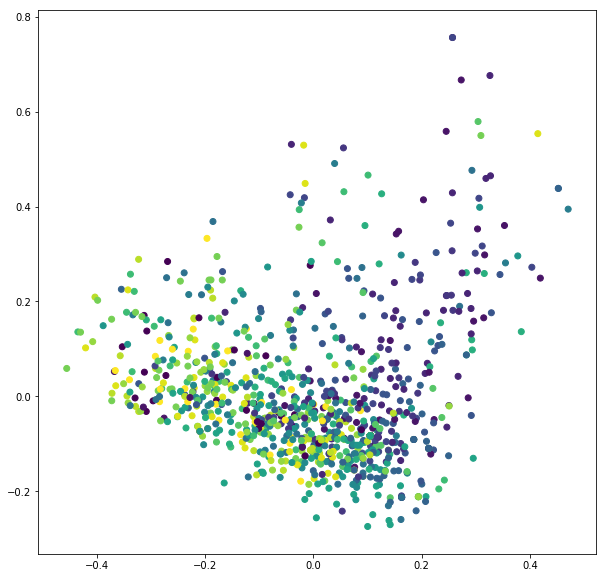

In [6]:
import matplotlib.cm as cm
import numpy as np

PCA_TFIDF = pca.transform(TFIDF.toarray())
print(PCA_TFIDF.shape)

plt.figure(figsize=(10,10))
plt.scatter(PCA_TFIDF[:,0], PCA_TFIDF[:,1], c=data_target)
plt.show()

#### Best example of PCA

Iris data set(https://en.wikipedia.org/wiki/Iris_flower_data_set)
 - Feature: the length and the width of the sepals and petals (4 features)  
 - Class: Iris setosa, Iris virginica and Iris versicolor

--------------------Explained variance ratio--------------------
[0.92461621 0.05301557]
--------------------Singular value--------------------
[25.08986398  6.00785254]


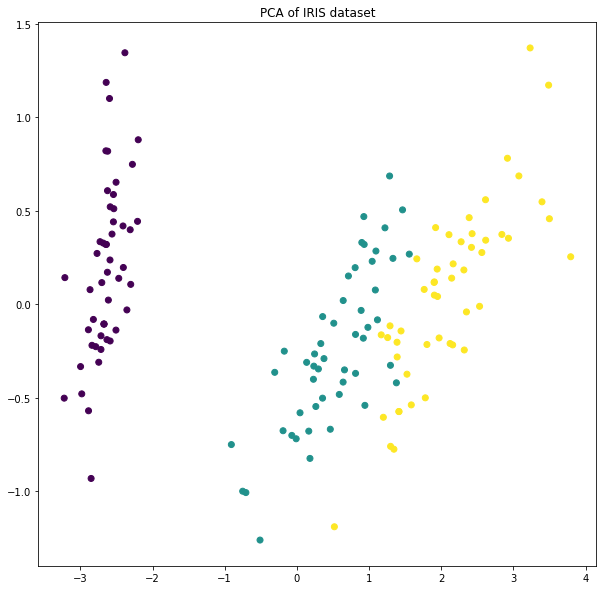

In [7]:
from sklearn.datasets import load_iris

IRIS = load_iris()
X = IRIS.data
y = IRIS.target
target_names = IRIS.target_names

pca_iris = PCA(n_components=2)
PCA_IRIS = pca_iris.fit(X).transform(X)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca_iris.explained_variance_ratio_)
print('-'*20 + 'Singular value' + '-'*20)
print(pca_iris.singular_values_)

plt.figure(figsize=(10,10))
plt.scatter(PCA_IRIS[:,0], PCA_IRIS[:,1], c=y)
plt.title('PCA of IRIS dataset')
plt.show()

### Singular value decomposition (SVD) and Latent semantic analysis (LSA)

In [8]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=5, random_state=None, tol=0.0)
SVD_TFIDF = svd.fit(TFIDF)

print("\nTopics in SVD(LSA) model:")
feature_names = tfidf_vectorizer.get_feature_names()
for topic_idx, topic in enumerate(svd.components_):
    message = "Topic #%d: " % topic_idx
    message += ", ".join([feature_names[i] for i in topic.argsort()[:-10 -1:-1]])
    print(message)


Topics in SVD(LSA) model:
Topic #0: just, don, like, know, people, think, does, time, good, use
Topic #1: thanks, mail, windows, does, know, help, edu, program, used, use
Topic #2: know, does, people, thanks, god, think, believe, say, mean, did
Topic #3: just, know, right, mail, does, key, edu, thanks, used, way
Topic #4: edu, think, good, don, mail, right, let, com, want, public
Topic #5: good, just, ve, seen, time, know, does, game, really, didn
Topic #6: like, think, don, ve, did, seen, drive, need, just, want
Topic #7: edu, like, ve, god, new, people, seen, things, believe, windows
Topic #8: use, ve, people, seen, good, used, key, government, don, know
Topic #9: drive, thanks, think, com, god, ve, seen, just, hard, people


### Non-negative matrix factorization (NMF)

In [9]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=10, random_state=1, beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1, l1_ratio=.5)
NMT_TFIDF = nmf.fit(TFIDF)

print("\nTopics in NMF model (generalized Kullback-Leibler divergence):")
feature_names = tfidf_vectorizer.get_feature_names()
for topic_idx, topic in enumerate(nmf.components_):
    message = "Topic #%d: " % topic_idx
    message += ", ".join([feature_names[i] for i in topic.argsort()[:-10 -1:-1]])
    print(message)


Topics in NMF model (generalized Kullback-Leibler divergence):
Topic #0: make, say, like, way, don, want, does, true, really, problem
Topic #1: thanks, does, mail, help, windows, know, program, file, need, set
Topic #2: new, year, probably, key, need, line, years, 10, number, information
Topic #3: just, right, know, way, mean, really, tell, used, doesn, mail
Topic #4: think, don, edu, did, want, public, let, going, know, case
Topic #5: good, time, didn, better, point, game, long, great, just, order
Topic #6: people, time, believe, god, fact, come, government, world, point, read
Topic #7: like, come, question, number, different, things, tell, high, believe, seen
Topic #8: use, ve, used, using, don, available, fact, thing, got, point
Topic #9: drive, work, seen, com, problems, hard, bit, read, got, ve


### Latent Dirichlet Allocation (LDA)

In [10]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=10, random_state=777, verbose=0, learning_method='batch', max_iter=100)
lda.fit(TFIDF)

print("\nTopics in LDA model:")
feature_names = tfidf_vectorizer.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
    message = "Topic #%d: " % topic_idx
    message += ", ".join([feature_names[i] for i in topic.argsort()[:-10 -1:-1]])
    print(message)


Topics in LDA model:
Topic #0: drive, chip, hard, believe, set, think, problems, look, problem, question
Topic #1: game, time, just, right, great, said, don, fact, like, think
Topic #2: line, 10, year, did, years, 12, ll, didn, let, dod
Topic #3: edu, mail, make, list, space, different, thanks, tell, order, word
Topic #4: good, case, number, given, government, following, like, come, tape, ve
Topic #5: thanks, does, windows, ve, seen, know, file, like, help, work
Topic #6: people, god, really, just, don, think, say, know, time, does
Topic #7: com, key, new, data, information, read, used, just, great, bit
Topic #8: used, use, program, like, son, high, want, probably, help, called
Topic #9: public, don, doesn, going, real, mean, way, know, need, better


#### Visualzing the LDA models with pyLDAvis

In [11]:
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda, TFIDF, tfidf_vectorizer)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
6      27.121424        1       1  0.015504 -0.023130
5      15.964870        1       2  0.091335 -0.012417
9       9.390239        1       3  0.064013 -0.046313
1       8.741332        1       4 -0.055282 -0.065626
7       7.230924        1       5  0.004638  0.200438
3       6.558147        1       6  0.036558 -0.299113
0       6.445528        1       7 -0.002413  0.078437
2       6.433784        1       8 -0.329681  0.003314
4       6.208981        1       9 -0.047602  0.090692
8       5.904772        1      10  0.222930  0.073717, topic_info=     Category       Freq         Term      Total  loglift  logprob
term                                                              
23    Default  33.000000          edu  33.000000  30.0000  30.0000
52    Default  29.000000         mail  29.000000  29.0000  29.0000
88    Default  38.000000          use  38.000000  28.0000  28.0000
89    Default  31.000000         used  31.000000  27.0000  27.0000
22    Default  23.000000        drive  23.000000  26.0000  26.0000
11    Default  22.000000          com  22.000000  25.0000  25.0000
42    Default  22.000000          key  22.000000  24.0000  24.0000
32    Default  39.000000         good  39.000000  23.0000  23.0000
47    Default  21.000000         line  21.000000  22.0000  22.0000
57    Default  34.000000          new  34.000000  21.0000  21.0000
0     Default  17.000000           10  17.000000  20.0000  20.0000
10    Default  19.000000         chip  19.000000  19.0000  19.0000
65    Default  20.000000      program  20.000000  18.0000  18.0000
28    Default  19.000000         game  19.000000  17.0000  17.0000
9     Default  24.000000         case  24.000000  16.0000  16.0000
98    Default  24.000000         year  24.000000  15.0000  15.0000
85    Default  37.000000         time  37.000000  14.0000  14.0000
5     Default  22.000000      believe  22.000000  13.0000  13.0000
15    Default  28.000000          did  28.000000  12.0000  12.0000
36    Default  17.000000         hard  17.000000  11.0000  11.0000
99    Default  21.000000        years  21.000000  10.0000  10.0000
13    Default  14.000000         data  14.000000   9.0000   9.0000
81    Default  36.000000       thanks  36.000000   8.0000   8.0000
53    Default  32.000000         make  32.000000   7.0000   7.0000
66    Default  17.000000       public  17.000000   6.0000   6.0000
40    Default  17.000000  information  17.000000   5.0000   5.0000
34    Default  20.000000   government  20.000000   4.0000   4.0000
19    Default  36.000000         does  36.000000   3.0000   3.0000
58    Default  19.000000       number  19.000000   2.0000   2.0000
29    Default  15.000000        given  15.000000   1.0000   1.0000
...       ...        ...          ...        ...      ...      ...
62    Topic10   5.106638     probably  21.686985   1.3832  -3.2072
37    Topic10   5.031679         help  21.862650   1.3604  -3.2220
97    Topic10   3.537868        world  17.814143   1.2129  -3.5743
46    Topic10   8.381955         like  55.735069   0.9349  -2.7117
90    Topic10   3.213475        using  21.929512   0.9089  -3.6704
50    Topic10   2.473180         long  17.230065   0.8883  -3.9323
82    Topic10   1.808210        thing  14.092673   0.7761  -4.2454
56    Topic10   2.637021         need  28.346852   0.4545  -3.8681
73    Topic10   2.038581          say  24.698553   0.3349  -4.1255
61    Topic10   1.359325        point  18.925031   0.1959  -4.5308
87    Topic10   0.878022          try  15.340876  -0.0312  -4.9679
51    Topic10   0.906835         look  16.283457  -0.0585  -4.9356
21    Topic10   1.458071          don  46.793926  -0.6392  -4.4607
54    Topic10   0.117675          max   4.247367  -0.7567  -6.9776
24    Topic10   0.429694         fact  18.033862  -0.9075  -5.6825
3     Topic10   0.119685     armenian   5.545318  -1.0064  -6.9607
18    Topic10   0.117724  

### Another dimension reduction method for Visualization
데이터 시각화만을 위한 차원축소 방법들
 
 - t-distributed Stochastic Neighbor Embedding (https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding)
 - Multidimensional scaling (https://en.wikipedia.org/wiki/Multidimensional_scaling)
 - Isomap (https://en.wikipedia.org/wiki/Isomap)
 - Locally Linear Embedding (https://en.wikipedia.org/wiki/Nonlinear_dimensionality_reduction#Locally-linear_embedding)
 
더 알아보기: https://en.wikipedia.org/wiki/Nonlinear_dimensionality_reduction

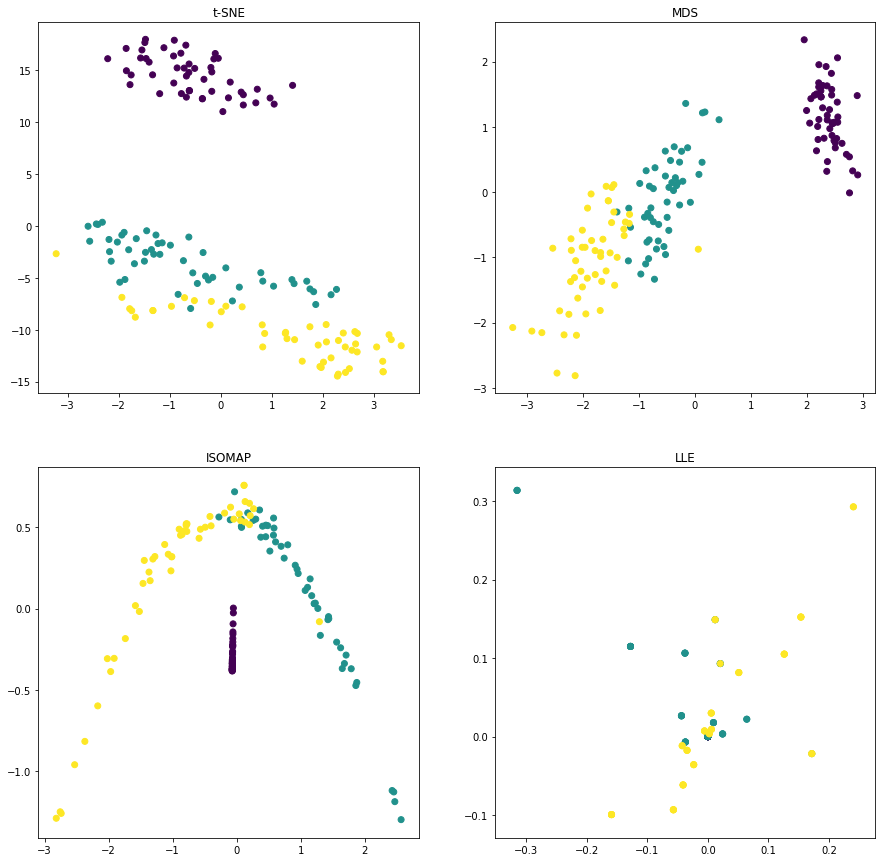

In [12]:
from sklearn.manifold import TSNE, MDS, Isomap, LocallyLinearEmbedding, SpectralEmbedding

TSNE_IRIS = TSNE(n_components=2, learning_rate=1.0, n_iter=750).fit_transform(X)
MDS_IRIS = MDS(n_components=2, dissimilarity='euclidean').fit_transform(X)
ISOMAP_IRIS = Isomap(n_neighbors=10, n_components=2).fit_transform(X)
LLE_IRIS = LocallyLinearEmbedding(n_neighbors=1, n_components=2).fit_transform(X)

plt.figure(figsize=(15,15))

plt.subplot(221)
plt.title("t-SNE")
plt.scatter(TSNE_IRIS[:,0], TSNE_IRIS[:,1], c=y)

plt.subplot(222)
plt.title("MDS")
plt.scatter(MDS_IRIS[:,0], MDS_IRIS[:,1], c=y)

plt.subplot(223)
plt.title("ISOMAP")
plt.scatter(ISOMAP_IRIS[:,0], ISOMAP_IRIS[:,1], c=y)

plt.subplot(224)
plt.title("LLE")
plt.scatter(LLE_IRIS[:,0], LLE_IRIS[:,1], c=y)

plt.show()